In [1]:
import os 
import numpy as np 
from locscale.include.emmer.ndimage.map_utils import load_map, save_as_mrc 
from locscale.include.emmer.ndimage.fsc_util import calculate_fsc_maps

pseudomodel_modmaps_dir = "/home/abharadwaj1/papers/elife_paper/figure_information/data/pseudomodel_modmaps"
hybrid_modmaps_dir = "/home/abharadwaj1/dev/map_sharpening/emmernet/locscale_inputs/hybrid_version_C/locscale_hybrid_version_C_model_maps"
atomic_modmaps_dir = "/home/abharadwaj1/dev/map_sharpening/emmernet/locscale_inputs/model_based_version_C/locscale_model_based_version_C_model_maps"
confidence_mask_dir = "/home/abharadwaj1/papers/elife_paper/figure_information/data/confidence_masks"
atomic_model_mask_dir = "/home/abharadwaj1/dev/data/atomic_model_mask"
unsharpened_map_dir = "/home/abharadwaj1/papers/elife_paper/figure_information/data/unsharpened_maps"
output_dir = "/home/abharadwaj1/papers/elife_paper/figure_information/data/fsc_curve_modmaps"
# assert all the directories exist
assert os.path.exists(pseudomodel_modmaps_dir), "pseudomodel_modmaps_dir does not exist"
assert os.path.exists(hybrid_modmaps_dir), "hybrid_modmaps_dir does not exist"
assert os.path.exists(atomic_modmaps_dir), "atomic_modmaps_dir does not exist"
assert os.path.exists(confidence_mask_dir), "confidence_mask_dir does not exist"
assert os.path.exists(atomic_model_mask_dir), "atomic_model_mask_dir does not exist"
assert os.path.exists(unsharpened_map_dir), "unsharpened_map_dir does not exist"



In [2]:
from locscale.emmernet.emmernet_functions import load_smoothened_mask
def get_smooth_masked_map(map_path, mask_path):
    smooth_mask = load_smoothened_mask(mask_path)[0]
    emmap, apix = load_map(map_path)
    masked_map = emmap * smooth_mask
    return masked_map, apix

def assert_all_paths_exist(*args):
    file_exists = True
    for path in args:
        if not os.path.exists(path):
            print(f"{path} does not exist")
            file_exists *= False
    return file_exists
        
def check_if_all_files_exist_emdb_pdb(emdb_pdb):
    emdb, pdb = emdb_pdb.split("_")
    int_emdb = int(emdb)
    unsharpened_map_path = os.path.join(unsharpened_map_dir, f"EMD_{int_emdb}_unsharpened_fullmap.mrc")
    confidence_mask_path = os.path.join(confidence_mask_dir, f"emd_{emdb}_FDR_confidence_final.map") 
    atomic_model_mask_path = os.path.join(atomic_model_mask_dir, f"atomic_model_mask_{emdb_pdb}.mrc")
    pseudomodel_unsym_modmap_path = os.path.join(pseudomodel_modmaps_dir, f"emd_{emdb}_FDR_confidence_final_gradient_pseudomodel_proper_element_composition_shifted_bfactors_4locscale.mrc")
    pseudomodel_sym_modmap_path = os.path.join(pseudomodel_modmaps_dir, f"emd_{emdb}_FDR_confidence_final_gradient_pseudomodel_proper_element_composition_shifted_bfactors_4locscale_C2_symmetry.mrc")
    if os.path.exists(pseudomodel_sym_modmap_path):
        pseudomodel_modmap_path = pseudomodel_sym_modmap_path
    else:
        pseudomodel_modmap_path = pseudomodel_unsym_modmap_path
    
    hybrid_modmap_path = os.path.join(hybrid_modmaps_dir, f"emd_{emdb}_hybrid_model_map_refined.mrc")
    atomic_modmap_path = os.path.join(atomic_modmaps_dir, f"emd_{emdb}_atomic_model_map_refined.mrc")
    
    file_exists = assert_all_paths_exist(unsharpened_map_path, confidence_mask_path, atomic_model_mask_path, \
                                        pseudomodel_modmap_path, hybrid_modmap_path, atomic_modmap_path)
    
    if file_exists:
        all_files = {
            "emdb_pdb": emdb_pdb,
            "unsharpened_map_path": unsharpened_map_path,
            "confidence_mask_path": confidence_mask_path,
            "atomic_model_mask_path": atomic_model_mask_path,
            "pseudomodel_modmap_path": pseudomodel_modmap_path,
            "hybrid_modmap_path": hybrid_modmap_path,
            "atomic_modmap_path": atomic_modmap_path
            
        }
        
        return all_files
    else:
        return None
    

        

In [3]:
# adapted mapdata selection
EMDB_PDB_ids_training = ["0026_6gl7", "0038_6gml", "0071_6gve", "0093_6gyn", "0094_6gyo", "0132_6h3c", "0234_6hjn", "0408_6nbd", "0415_6nbq", "4288_6fo2", "0452_6nmi", "0490_6nr8", "0492_6nra", "0567_6o0h", "0589_6nmi", "0592_6o1m", "0776_6ku9", "10049_6rx4", "10069_6s01", "10100_6s5t", "10105_6s6t", "10106_6s6u", "10273_6sof", "10279_6sp2", "10324_6swe", "10333_6swy", "10418_6t9n", "10534_6tni", "10585_6ttu", "10595_6tut", "10617_6xt9", "20145_6oo4", "20146_6oo5", "20189_6osy", "20234_6p19", "20249_6p4h", "20254_6p5a", "20259_6p62", "20270_6p7v", "20271_6p7w", "20352_6pik", "20521_6pxm", "20986_6v0b", "21012_6v1i", "21107_6v8o", "21144_6vbu", "21391_6vv5", "3661_5no2", "3662_5no3", "3802_5of4", "3885_6el1", "3908_6eoj", "4032_5lc5", "4073_5lmn", "4074_5lmo", "4079_5lmt", "4148_5m3m", "4162_6ezo", "4192_6f6w", "4214_6fai", "4241_6fe8", "4272_6fki", "4401_6i2x", "4404_6i3m", "4429_6i84", "4588_6qm5", "4589_6qm6", "4593_6qma", "4728_6r5k", "4746_6r7x", "4759_6r8f", "4888_6ric", "4889_6rid", "4890_6rie", "4907_6rkd", "4917_6rla", "4918_6rlb", "4941_6rn3", "4983_6rqj", "7009_6ave", "7041_6b3q", "7065_6b7y", "7090_6bf6", "7334_6c23", "7335_6c24", "8911_6dt0", "8958_6e1n", "8960_6e1p", "9258_6muw", "9259_6mux", "9931_6k7g", "9934_6k7i", "9935_6k7j", "9939_6k7l", "9941_6k7m", "9695_6iok"]
EMDB_PDB_ids_validation = ["0257_6hra", "0264_6hs7", "0499_6nsk", "10401_6t8h", "20449_6pqo", "20849_6uqk", "4611_6qp6", "4646_6qvb", "4733_6r69", "4789_6rb9", "7133_6bqv", "7882_6dg7", "8069_5i08", "9112_6mgv", "9298_6mzc", "9374_6nhv"]
EMDB_PDB_ids_test = ["0282_6huo", "0311_6hz5", "0560_6nzu", "10365_6t23", "20220_6oxl", "20226_6p07", "3545_5mqf", "4141_5m1s", "4531_6qdw", "4571_6qk7", "4997_6rtc", "7127_6bpq", "7573_6crv", "8702_5vkq", "9610_6adq"]
EMDB_PDB_ids_all = EMDB_PDB_ids_training + EMDB_PDB_ids_validation + EMDB_PDB_ids_test



In [4]:
from locscale.include.emmer.ndimage.profile_tools import frequency_array 

def compute_fsc_curve_for_data(emdb_pdb_input_files):
    unsharpened_map_path = emdb_pdb_input_files["unsharpened_map_path"]
    confidence_mask_path = emdb_pdb_input_files["confidence_mask_path"]
    atomic_model_mask_path = emdb_pdb_input_files["atomic_model_mask_path"]
    pseudomodel_modmap_path = emdb_pdb_input_files["pseudomodel_modmap_path"]
    hybrid_modmap_path = emdb_pdb_input_files["hybrid_modmap_path"]
    atomic_modmap_path = emdb_pdb_input_files["atomic_modmap_path"]
    emdb_pdb = emdb_pdb_input_files["emdb_pdb"]
    # # get fdr masked files 
    # unsharpened_map, apix = get_smooth_masked_map(unsharpened_map_path, confidence_mask_path)
    # pseudomodel_modmap, apix = get_smooth_masked_map(pseudomodel_modmap_path, confidence_mask_path)
    # hybrid_modmap, apix = get_smooth_masked_map(hybrid_modmap_path, confidence_mask_path)
    # atomic_modmap, apix = get_smooth_masked_map(atomic_modmap_path, confidence_mask_path)
    
    unsharpened_map, apix = load_map(unsharpened_map_path)
    pseudomodel_modmap, apix = load_map(pseudomodel_modmap_path)
    hybrid_modmap, apix = load_map(hybrid_modmap_path)
    atomic_modmap, apix = load_map(atomic_modmap_path)
    
    # compute fsc curves
    fsc_unsharpened_pseudomodel = calculate_fsc_maps(unsharpened_map, pseudomodel_modmap)
    fsc_unsharpened_hybrid = calculate_fsc_maps(unsharpened_map, hybrid_modmap)
    fsc_unsharpened_atomic = calculate_fsc_maps(unsharpened_map, atomic_modmap)
    
    freq = frequency_array(fsc_unsharpened_atomic, apix)
    
    wilson_cutoff_ang = 10 
    wilson_cutoff = 1 / (wilson_cutoff_ang) 
    
    wilson_index = np.where(freq > wilson_cutoff)[0][0]
    
    fsc_average_guinier_atomic = np.mean(fsc_unsharpened_atomic[:wilson_index])
    fsc_average_guinier_hybrid = np.mean(fsc_unsharpened_hybrid[:wilson_index])
    fsc_average_guinier_pseudomodel = np.mean(fsc_unsharpened_pseudomodel[:wilson_index])
    
    fsc_average_wilson_atomic = np.mean(fsc_unsharpened_atomic[wilson_index:])
    fsc_average_wilson_hybrid = np.mean(fsc_unsharpened_hybrid[wilson_index:])
    fsc_average_wilson_pseudomodel = np.mean(fsc_unsharpened_pseudomodel[wilson_index:])
    
    return_values = {
        "fsc_average_guinier_atomic": fsc_average_guinier_atomic,
        "fsc_average_guinier_hybrid": fsc_average_guinier_hybrid,
        "fsc_average_guinier_pseudomodel": fsc_average_guinier_pseudomodel,
        "fsc_average_wilson_atomic": fsc_average_wilson_atomic,
        "fsc_average_wilson_hybrid": fsc_average_wilson_hybrid,
        "fsc_average_wilson_pseudomodel": fsc_average_wilson_pseudomodel,
        "fsc_unsharpened_atomic": fsc_unsharpened_atomic,
        "fsc_unsharpened_hybrid": fsc_unsharpened_hybrid,
        "fsc_unsharpened_pseudomodel": fsc_unsharpened_pseudomodel,
        "freq": freq,
        "apix": apix,
        "emdb_pdb": emdb_pdb
    }
    
    return return_values



In [5]:
filtered_input_files = {}
for emdb_pdb in EMDB_PDB_ids_test:
    emdb_input_files = check_if_all_files_exist_emdb_pdb(emdb_pdb)
    if emdb_input_files is not None:
        filtered_input_files[emdb_pdb] = emdb_input_files
        
print(f"Number of files: {len(filtered_input_files)}")

/home/abharadwaj1/dev/map_sharpening/emmernet/locscale_inputs/hybrid_version_C/locscale_hybrid_version_C_model_maps/emd_0560_hybrid_model_map_refined.mrc does not exist
/home/abharadwaj1/dev/data/atomic_model_mask/atomic_model_mask_3545_5mqf.mrc does not exist
/home/abharadwaj1/papers/elife_paper/figure_information/data/pseudomodel_modmaps/emd_3545_FDR_confidence_final_gradient_pseudomodel_proper_element_composition_shifted_bfactors_4locscale.mrc does not exist
/home/abharadwaj1/dev/map_sharpening/emmernet/locscale_inputs/hybrid_version_C/locscale_hybrid_version_C_model_maps/emd_4141_hybrid_model_map_refined.mrc does not exist
/home/abharadwaj1/dev/data/atomic_model_mask/atomic_model_mask_4531_6qdw.mrc does not exist
/home/abharadwaj1/papers/elife_paper/figure_information/data/pseudomodel_modmaps/emd_4531_FDR_confidence_final_gradient_pseudomodel_proper_element_composition_shifted_bfactors_4locscale.mrc does not exist
/home/abharadwaj1/dev/map_sharpening/emmernet/locscale_inputs/hybrid

In [6]:
# use joblib to parallelize the computation of fsc curves
from joblib import Parallel, delayed
import pickle

n_jobs = 11
verbose = 10

#fsc_curves = Parallel(n_jobs=n_jobs, verbose=verbose)(delayed(compute_fsc_curve_for_data)(emdb_pdb_input_files) for emdb_pdb_input_files in filtered_input_files.values())
# save the fsc curves 

output_file = os.path.join(output_dir, "fsc_curves_test.pkl")
# with open(output_file, "wb") as f:
#     pickle.dump(fsc_curves, f)
fsc_curves = pickle.load(open(output_file, "rb"))

In [7]:
# time for analysis
import matplotlib.pyplot as plt
guinier_atomic_values = []
guinier_hybrid_values = []
guinier_pseudomodel_values = []

wilson_atomic_values = []
wilson_hybrid_values = []
wilson_pseudomodel_values = []

for fsc_curve in fsc_curves:
    guinier_atomic_values.append(fsc_curve["fsc_average_guinier_atomic"])
    guinier_hybrid_values.append(fsc_curve["fsc_average_guinier_hybrid"])
    guinier_pseudomodel_values.append(fsc_curve["fsc_average_guinier_pseudomodel"])
    
    wilson_atomic_values.append(fsc_curve["fsc_average_wilson_atomic"])
    wilson_hybrid_values.append(fsc_curve["fsc_average_wilson_hybrid"])
    wilson_pseudomodel_values.append(fsc_curve["fsc_average_wilson_pseudomodel"])

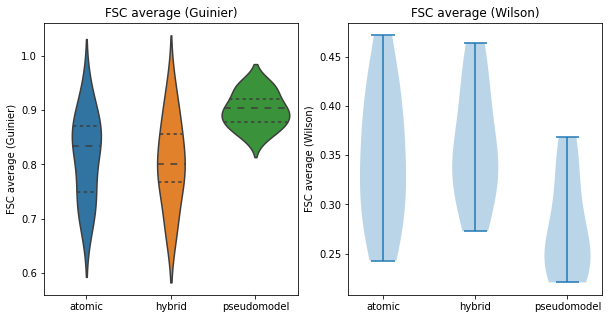

In [12]:
import seaborn as sns
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.violinplot([guinier_atomic_values, guinier_hybrid_values, guinier_pseudomodel_values], ax=ax[0], inner="quartile")
# add data points
#sns.swarmplot(data=[guinier_atomic_values, guinier_hybrid_values, guinier_pseudomodel_values], ax=ax[0], color="black")
# change xticks
ax[0].set_xticks([0, 1, 2])
ax[0].set_xticklabels(["atomic", "hybrid", "pseudomodel"])
ax[0].set_ylabel("FSC average (Guinier)")
ax[0].set_title("FSC average (Guinier)")

ax[1].violinplot([wilson_atomic_values, wilson_hybrid_values, wilson_pseudomodel_values])
ax[1].set_xticks([1, 2, 3])
ax[1].set_xticklabels(["atomic", "hybrid", "pseudomodel"])
ax[1].set_ylabel("FSC average (Wilson)")
ax[1].set_title("FSC average (Wilson)")

plt.show()


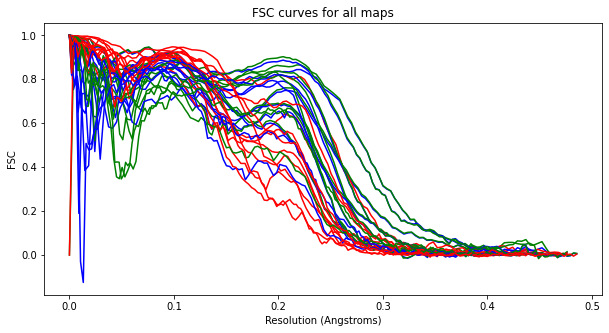

In [9]:
# plot the fsc curves for three different maps in three colors 
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
for fsc_curve in fsc_curves:
    atomic_curve = fsc_curve["fsc_unsharpened_atomic"]
    hybrid_curve = fsc_curve["fsc_unsharpened_hybrid"]
    pseudomodel_curve = fsc_curve["fsc_unsharpened_pseudomodel"]
    freq = fsc_curve["freq"]
    ax.plot(freq, atomic_curve, color="blue", alpha=1)
    ax.plot(freq, hybrid_curve, color="green", alpha=1)
    ax.plot(freq, pseudomodel_curve, color="red", alpha=1)
    
ax.set_xlabel("Resolution (Angstroms)")
ax.set_ylabel("FSC")
ax.set_title("FSC curves for all maps")
plt.show()

In [15]:
fsc_curves[0]['emdb_pdb']

'0282_6huo'

In [16]:
freqs_resample = np.linspace(0, 0.5, 1000)
fsc_curves_resample = {}
for fsc_curve in fsc_curves:
    atomic_fsc_curve = fsc_curve["fsc_unsharpened_atomic"]
    hybrid_fsc_curve = fsc_curve["fsc_unsharpened_hybrid"]
    pseudomodel_fsc_curve = fsc_curve["fsc_unsharpened_pseudomodel"]
    
    resampled_atomic_fsc_curve = np.interp(freqs_resample, fsc_curve["freq"], atomic_fsc_curve)
    resampled_hybrid_fsc_curve = np.interp(freqs_resample, fsc_curve["freq"], hybrid_fsc_curve)
    resampled_pseudomodel_fsc_curve = np.interp(freqs_resample, fsc_curve["freq"], pseudomodel_fsc_curve)
    
    fsc_curves_resample[fsc_curve['emdb_pdb']] = fsc_curve.copy()
    fsc_curves_resample[fsc_curve['emdb_pdb']]["freqs_resample"] = freqs_resample
    fsc_curves_resample[fsc_curve['emdb_pdb']]["fsc_unsharpened_atomic_resampled"] = resampled_atomic_fsc_curve
    fsc_curves_resample[fsc_curve['emdb_pdb']]["fsc_unsharpened_hybrid_resampled"] = resampled_hybrid_fsc_curve
    fsc_curves_resample[fsc_curve['emdb_pdb']]["fsc_unsharpened_pseudomodel_resampled"] = resampled_pseudomodel_fsc_curve
    



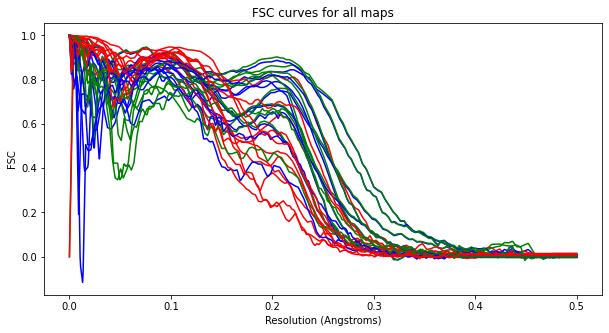

In [17]:
# plot the fsc curves for three different maps in three colors
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
for fsc_curve in fsc_curves_resample:
    freq = fsc_curves_resample[fsc_curve]["freqs_resample"]
    atomic_curve = fsc_curves_resample[fsc_curve]["fsc_unsharpened_atomic_resampled"]
    hybrid_curve = fsc_curves_resample[fsc_curve]["fsc_unsharpened_hybrid_resampled"]
    pseudomodel_curve = fsc_curves_resample[fsc_curve]["fsc_unsharpened_pseudomodel_resampled"]
    ax.plot(freq, atomic_curve, color="blue", alpha=1)
    ax.plot(freq, hybrid_curve, color="green", alpha=1)
    ax.plot(freq, pseudomodel_curve, color="red", alpha=1)
    

ax.set_xlabel("Resolution (Angstroms)")
ax.set_ylabel("FSC")
ax.set_title("FSC curves for all maps")
plt.show()

In [39]:

def pretty_plot_confidence_interval(x_array, *list_of_y_arrays, confidence_interval=95,  \
                                    figsize_cm=(14,8), fontsize=10,linewidth=1, \
                                font="Helvetica",fontscale=1, alpha=0.2, xticks=None, \
                                num_xticks=5, yticks=None, ylims=None, xlims=None, labelsize=None, title=None, \
                                xlabel=None, ylabel=None, showlegend=True):
    
    import matplotlib.pyplot as plt
    from matplotlib.pyplot import cm
    from locscale.include.emmer.ndimage.profile_tools import crop_profile_between_frequency
    import seaborn as sns
    import matplotlib 
    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42
    # set the global font size for the plot
    from scipy import stats
        
    plt.rcParams.update({'font.size': fontsize})
    figsize = (figsize_cm[0]/2.54, figsize_cm[1]/2.54) # convert cm to inches
    
    sns.set_theme(context="paper", font=font, font_scale=fontscale)
    # Set font size for all text in the figure
    sns.set_style("white")
    
    colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'cyan', 'magenta', 'yellow']
    
    fig, ax = plt.subplots(1, 1, figsize=figsize, dpi=600)

    for idx, y in enumerate(list_of_y_arrays):
        y = np.array(y)

        # Calculate the means and standard error
        mean_y = np.mean(y, axis=0)
        stderr_y = stats.sem(y, axis=0)

        # Calculate the t-values for the given confidence interval
        df = len(y) - 1
        t_value = stats.t.ppf((1 + confidence_interval/100) / 2, df)
        margin_of_error = stderr_y * t_value

        # Plot
        ax.plot(x_array, mean_y, color=colors[idx % len(colors)], alpha=1, label=f"Curve {idx + 1}", linewidth=linewidth)
        ax.fill_between(x_array, mean_y - margin_of_error, mean_y + margin_of_error, color=colors[idx % len(colors)], alpha=alpha)

    if xlabel is not None:
        ax.set_xlabel(xlabel, fontsize=fontsize)
    if ylabel is not None:
        ax.set_ylabel(ylabel, fontsize=fontsize)
        
    if xticks is not None:
        ax.set_xticks([round(xtick,2) for xtick in xticks])
        # rotate the xticks
        for tick in ax.get_xticklabels():
            tick.set_rotation(45)
    else:
        ax.set_xticks(np.linspace(x_array[0], x_array[-1], num_xticks).round(2))
    
    if yticks is not None:
        ax.set_yticks(yticks)
    if ylims is not None:
        ax.set_ylim(ylims)
    if xlims is not None:
        ax.set_xlim(xlims)
    if labelsize is not None:
        ax.tick_params(axis='both', which='major', labelsize=labelsize)
    if title is not None:
        ax.set_title(title)
    if showlegend:
        ax.legend(loc="best")
    plt.tight_layout()
    
    return fig, ax

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


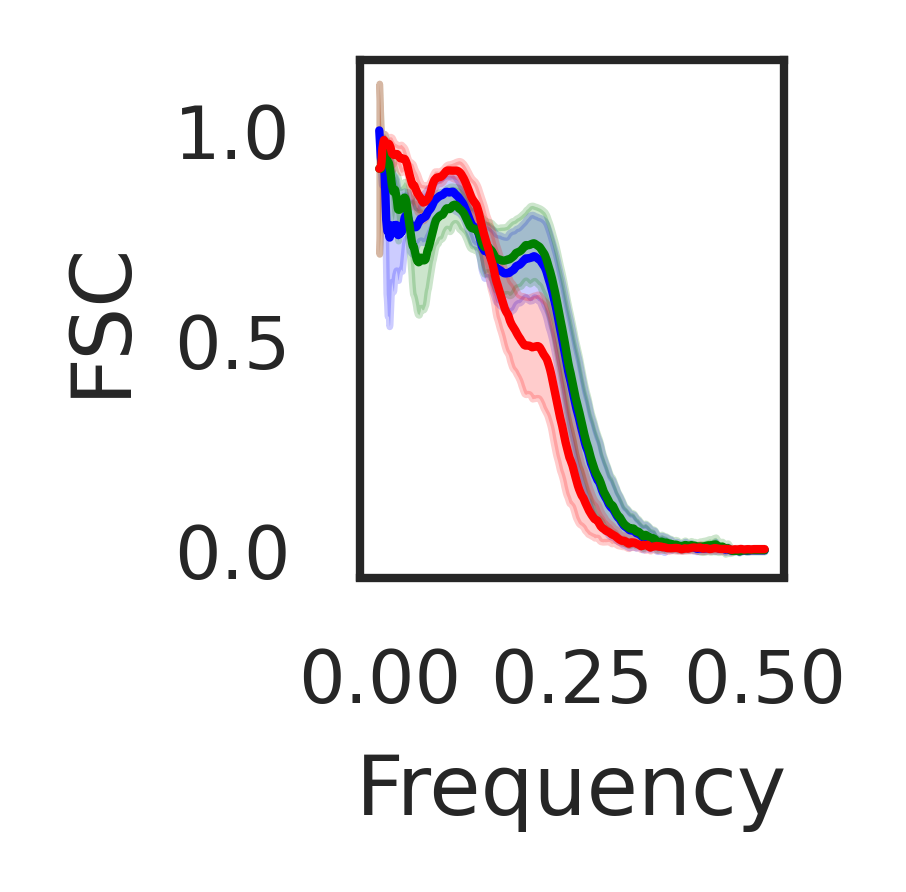

In [44]:
mean_atomic_fsc_curve = np.mean([fsc_curves_resample[fsc_curve]["fsc_unsharpened_atomic_resampled"] for fsc_curve in fsc_curves_resample], axis=0)
mean_hybrid_fsc_curve = np.mean([fsc_curves_resample[fsc_curve]["fsc_unsharpened_hybrid_resampled"] for fsc_curve in fsc_curves_resample], axis=0)
mean_pseudomodel_fsc_curve = np.mean([fsc_curves_resample[fsc_curve]["fsc_unsharpened_pseudomodel_resampled"] for fsc_curve in fsc_curves_resample], axis=0)

atomic_fsc_curves_list = [fsc_curves_resample[fsc_curve]["fsc_unsharpened_atomic_resampled"] for fsc_curve in fsc_curves_resample]
hybrid_fsc_curves_list = [fsc_curves_resample[fsc_curve]["fsc_unsharpened_hybrid_resampled"] for fsc_curve in fsc_curves_resample]
pseudomodel_fsc_curves_list = [fsc_curves_resample[fsc_curve]["fsc_unsharpened_pseudomodel_resampled"] for fsc_curve in fsc_curves_resample]

freq_resampled = fsc_curves_resample[fsc_curve]["freqs_resample"]

fig, ax = pretty_plot_confidence_interval(freq_resampled, atomic_fsc_curves_list, hybrid_fsc_curves_list, pseudomodel_fsc_curves_list, \
                                confidence_interval=95, figsize_cm=(4,4), fontsize=10,linewidth=1, \
                                font="Helvetica",fontscale=1, alpha=0.2, xticks=None, \
                                num_xticks=3, yticks=None, ylims=None, xlims=None, labelsize=None, title=None, \
                                xlabel="Frequency", ylabel="FSC", showlegend=False)

fig.savefig(os.path.join(output_dir, "fsc_curves_test.eps"),bbox_inches='tight')

In [2]:
atomic_model_path = "/home/abharadwaj1/papers/elife_paper/figure_information/data/deposited_atomic_models/PDB_5vkq_unrefined_shifted_servalcat_refined_shifted_servalcat_refined.pdb"
import gemmi
import os 
# convert atomic model to zero error pseudomodel 

def replace_atoms_with_pseudo_atoms(atomic_model_path):
    st = gemmi.read_structure(atomic_model_path)
    
    for cra in st[0].all():
        cra.atom.name = "O"
        cra.atom.element = gemmi.Element("O")
        cra.residue.name = "HOH"
    
    return st

st = replace_atoms_with_pseudo_atoms(atomic_model_path)

perturbation_output_dir = "/home/abharadwaj1/papers/elife_paper/figure_information/outputs/effect_of_pertrubation_on_fsc"

st.write_pdb(os.path.join(perturbation_output_dir, "PDB_5vkq_pseudo_model.pdb"))



In [8]:
from locscale.include.emmer.pdb.pdb_utils import shake_pdb_within_mask
from locscale.include.emmer.ndimage.map_utils import load_map, save_as_mrc
from locscale.include.emmer.pdb.pdb_to_map import pdb2map

perturbation_magnitudes = [0, 0.1, 0.5, 1, 2, 5, 10]
atomic_mask_path = os.path.join(atomic_model_mask_dir, "atomic_model_mask_8702_5vkq_strict_3A.mrc")
mask, apix = load_map(atomic_mask_path)
for perturb_magnitude in perturbation_magnitudes[:1]:
    num_atoms_folder = os.path.join(perturbation_output_dir, "perturb_magnitude_{}_pm".format(int(perturb_magnitude*10)))
    if not os.path.exists(num_atoms_folder):
        os.makedirs(num_atoms_folder)
    input_pdb_path = os.path.join(perturbation_output_dir, "PDB_5vkq_pseudo_model.pdb")
    perturbed_pdb_path = os.path.join(num_atoms_folder, "perturbed_pdb_rmsd_{}A.pdb".format(perturb_magnitude))
    perturbed_pdb = shake_pdb_within_mask(pdb_path = input_pdb_path, mask_path = atomic_mask_path, \
                                          rmsd_magnitude = perturb_magnitude, use_pdb_mask = False)
    
    perturbed_pdb.write_pdb(perturbed_pdb_path)
    
    perturbed_model_map = pdb2map(perturbed_pdb, apix=apix, size=mask.shape)
    
    model_map_path = os.path.join(num_atoms_folder, "perturbed_model_map_rmsd_{}A.mrc".format(perturb_magnitude))
    save_as_mrc(perturbed_model_map,model_map_path, apix)

Shaking the input structure with input RMSD of 0...
Shake radii 0.0
Checking for atoms outside the mask...


Validating positions: 100%|██████████| 41900/41900 [00:00<00:00, 1500318.75it/s]


0 atoms found outside the mask! Randomly placing them inside the mask:
Done... Now converting into PDB
RMSD between input structure and native shaken structure: 0.0 A
RMSD between the input and output structure is: 0.0 A


In [22]:
from locscale.include.emmer.ndimage.fsc_util import calculate_fsc_maps
fsc_with_unsharpened_map = {} 
unsharpened_map_path = os.path.join(unsharpened_map_dir, "EMD_8702_unsharpened_fullmap.mrc")

for perturb_magnitude in perturbation_magnitudes:
    perturbed_model_map_path = os.path.join(perturbation_output_dir, "perturb_magnitude_{}_pm".format(int(perturb_magnitude*10)), "perturbed_model_map_rmsd_{}A.mrc".format(perturb_magnitude))
    
    fsc_unsharp_perturbed = calculate_fsc_maps(unsharpened_map_path, perturbed_model_map_path)
    fsc_with_unsharpened_map[perturb_magnitude] = fsc_unsharp_perturbed
    print("Done with perturbation magnitude: {}".format(perturb_magnitude))
    

Done with perturbation magnitude: 0.1
Done with perturbation magnitude: 0.5
Done with perturbation magnitude: 1
Done with perturbation magnitude: 2
Done with perturbation magnitude: 5
Done with perturbation magnitude: 10


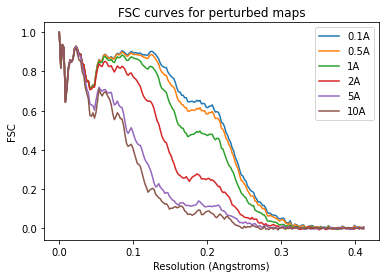

In [23]:
freq_8702 = frequency_array(fsc_with_unsharpened_map[0.1], apix)
for perturb_magnitude, fsc_curve in fsc_with_unsharpened_map.items():
    plt.plot(freq_8702, fsc_curve, label="{}A".format(perturb_magnitude))
    
plt.xlabel("Resolution (Angstroms)")
plt.ylabel("FSC")
plt.title("FSC curves for perturbed maps")
plt.legend()
plt.show()
